In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
data = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data = data.drop(columns = ["show_id"],axis = 1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


In [6]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
#Check for missing values
data.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

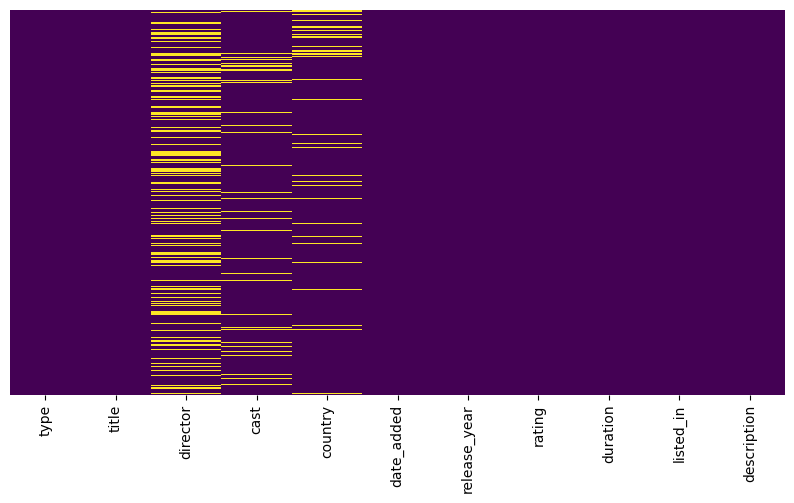

In [8]:
#Using Heat map
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,5)
sns.heatmap(data.isnull(),yticklabels = False,cbar=False,cmap = 'viridis')

In [9]:
#Handling missing values
data['director'] = data['director'].fillna("No Data Available")
data['cast'] = data['cast'].fillna("No Data Available")
data['country'] = data['country'].fillna("No Data Available")
data['date_added']=data['date_added'].fillna(data['date_added'].mode()[0])          
data['rating']=data['rating'].fillna(data['rating'].mode()[0])      
data['duration']=data['duration'].fillna('No Data Available')    

In [10]:
type_count = data['type'].value_counts()

([<matplotlib.patches.Wedge at 0x783d2c84cc10>,
 [Text(-0.8264818406177522, 1.1669737645418996, 'Movie'),
  Text(0.826481840617752, -1.1669737645418996, 'TV Show')],
 [Text(-0.4508082767005921, 0.6365311442955816, '69.62%'),
  Text(0.450808276700592, -0.6365311442955817, '30.38%')])

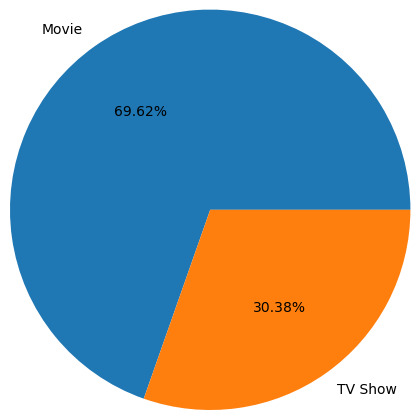

In [11]:
plt.pie(type_count.values,labels = type_count.index,autopct = '%1.2f%%',radius = 1.3)

Observation:

Netflix has about 69.62% of movies and 30.38% TV Shows

In [12]:
data_duration = data[data['type']=='TV Show'][['type','duration']]
data_duration = data_duration.groupby('duration').size().reset_index()
data_duration = data_duration.rename(columns = {0:'duration_count'})

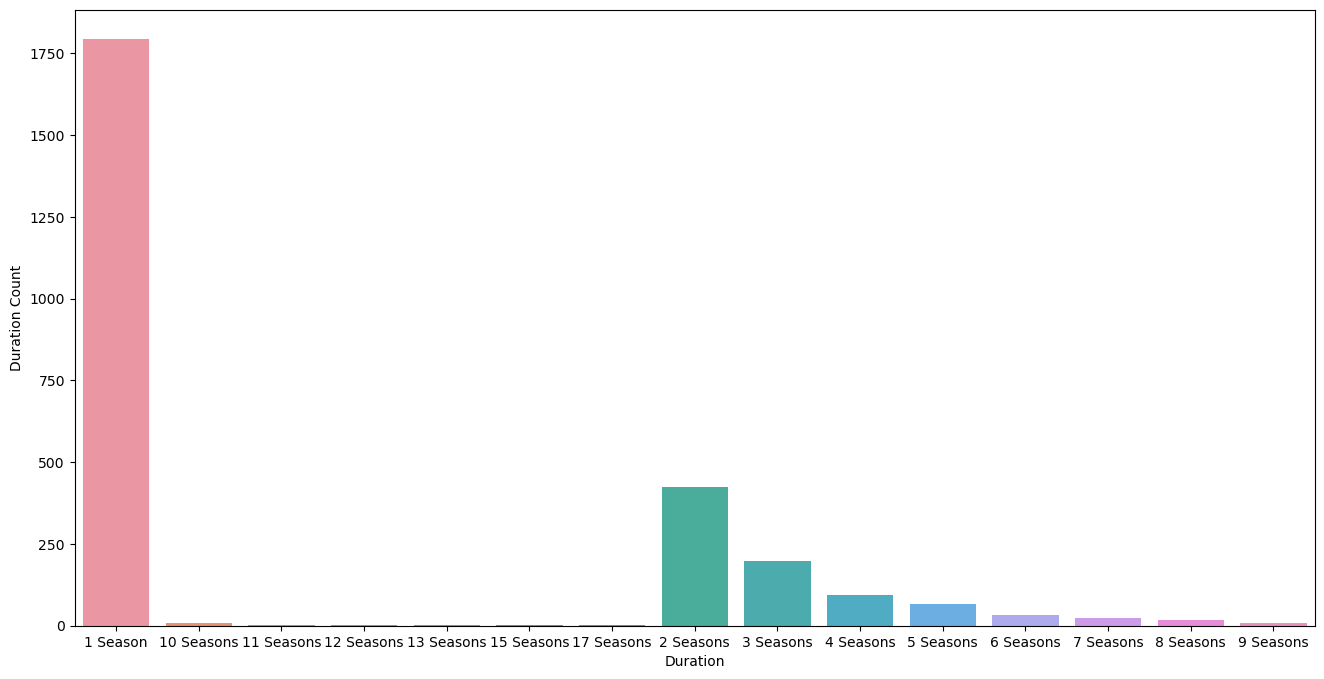

In [13]:
plt.figure(figsize=(16,8))
sns.barplot(x = 'duration',y = 'duration_count',data = data_duration)
plt.ylabel("Duration Count")
plt.xlabel("Duration")
plt.show()

Observation 

Most of the TV Shows in Netflix has only 1 Season

In [14]:
tvshow_produced = data[data['type']=='TV Show'][['type','country']]
tvshow_produced = tvshow_produced.groupby(['country']).size().reset_index()
tvshow_produced = tvshow_produced.sort_values(by=0,ascending = False)[0:10]

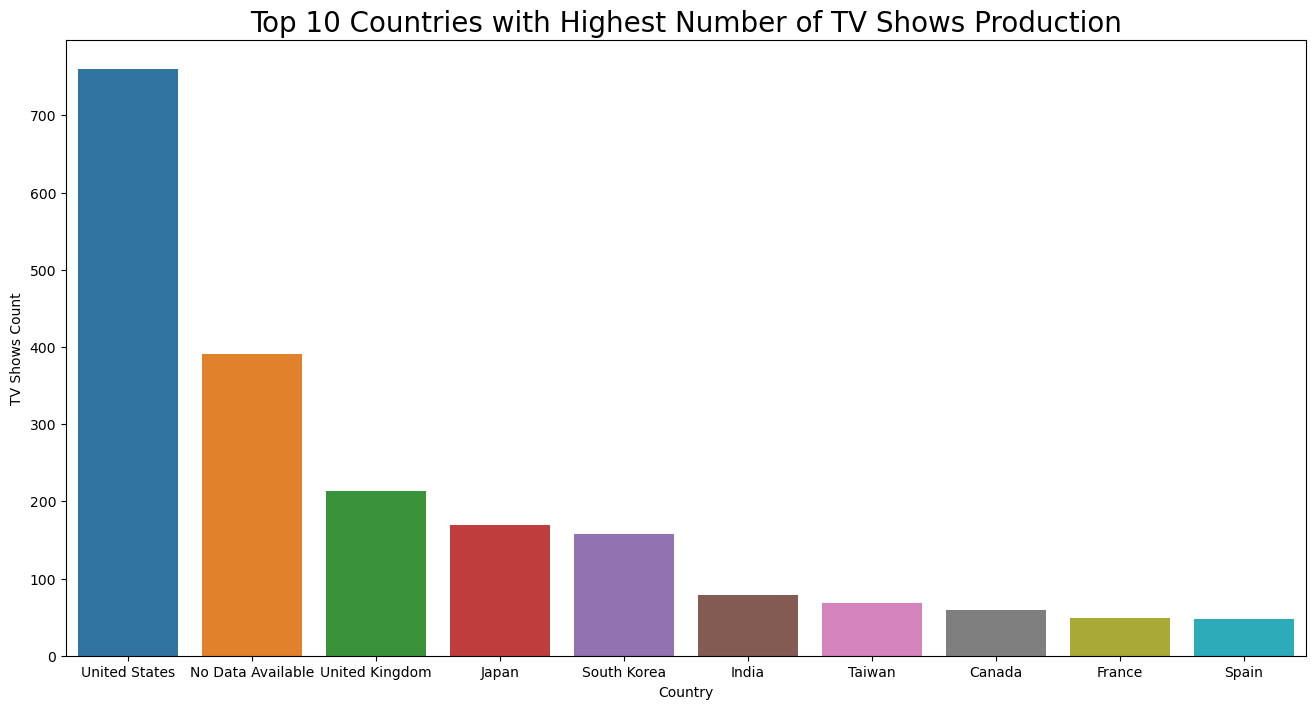

In [15]:
plt.figure(figsize=(16,8))
plt.title("Top 10 Countries with Highest Number of TV Shows Production",fontsize=20)
bar=sns.barplot(x=tvshow_produced["country"],y=tvshow_produced[0])
plt.ylabel("TV Shows Count")
plt.xlabel("Country")
plt.show()

Observation

United States has produced more number of TV Shows

In [16]:
movie_produced = data[data['type']=='Movie'][['type','country']]
movie_produced = movie_produced.groupby(['country']).size().reset_index()
movie_produced = movie_produced.sort_values(by=0,ascending = False)[0:10]

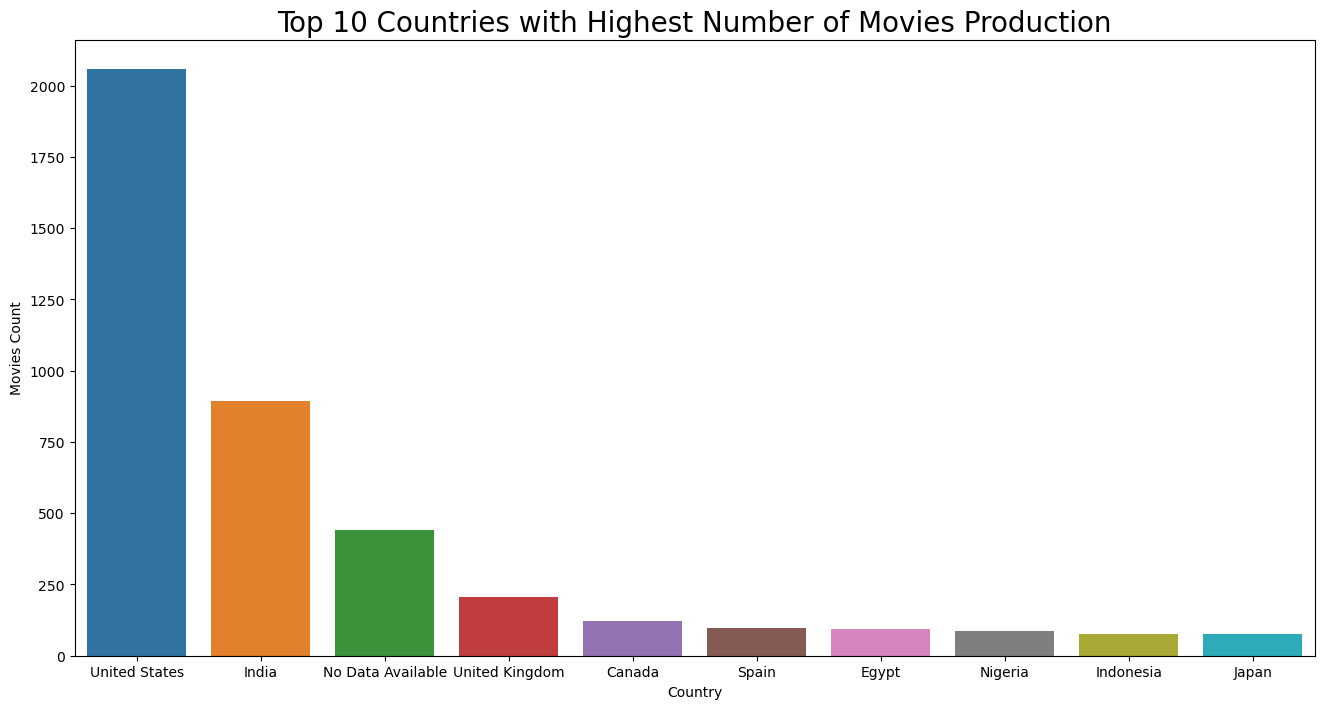

In [17]:
plt.figure(figsize=(16,8))
plt.title("Top 10 Countries with Highest Number of Movies Production",fontsize=20)
bar=sns.barplot(x=movie_produced["country"],y=movie_produced[0])
plt.ylabel("Movies Count")
plt.xlabel("Country")
plt.show()

Observation

United States has produced more number of Movies

In [18]:
#extract only month from date_added column
month = data['date_added'].values
for j in range(len(month)):
     month[j] = month[j].split()[0]

In [19]:
#Convert array to dataframe
month = pd.DataFrame(month, columns = ['Month'])

In [20]:
month = month.groupby('Month').size().reset_index()

In [21]:
month

,Month,0
0,April,764
1,August,755
2,December,813
3,February,563
4,January,748
5,July,827
6,June,728
7,March,742
8,May,632
9,November,705


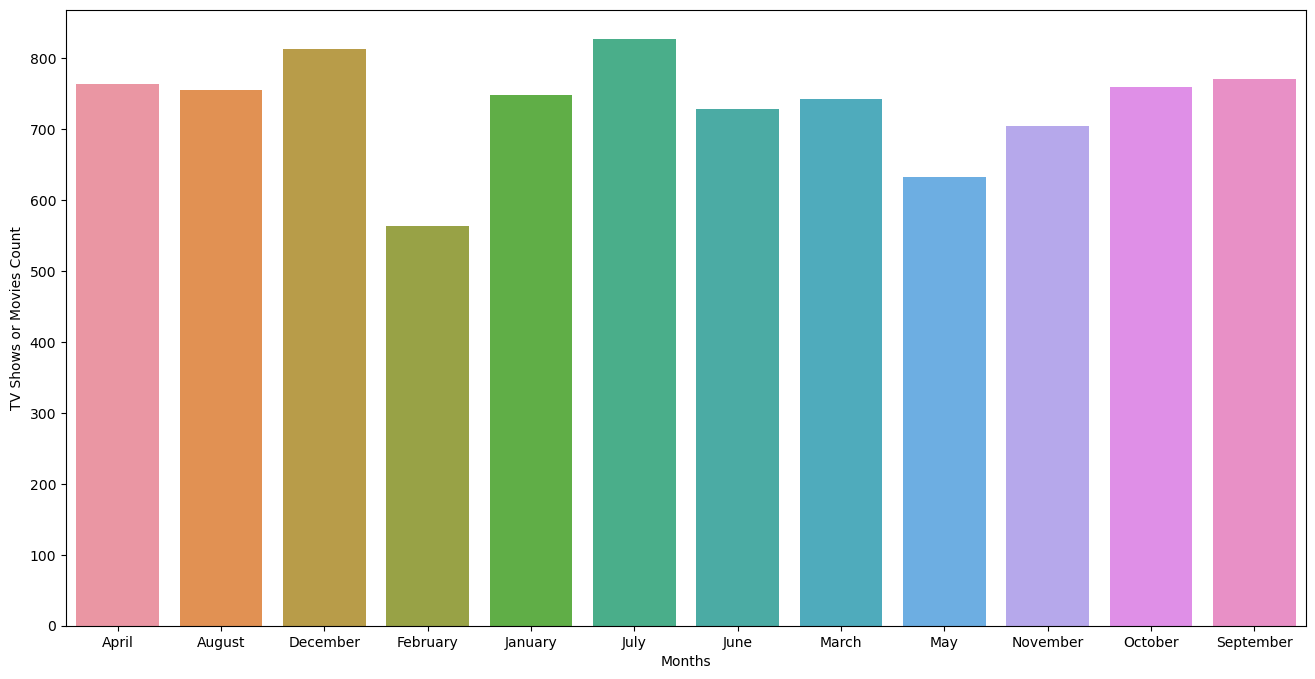

In [22]:
plt.figure(figsize=(16,8))
bar=sns.barplot(x=month["Month"],y=month[0])
plt.ylabel("TV Shows or Movies Count")
plt.xlabel("Months")
plt.show()

Observation

Every month there is almost the same number of TV Shows or Movies added.

In [23]:
release_year=data.groupby(['release_year']).size().reset_index().sort_values(by = 0,ascending = False)[0:10]

([<matplotlib.patches.Wedge at 0x783d2c695120>,
 [Text(1.2494023714352367, 0.6956246935323726, '2018'),
  Text(0.13943566096831045, 1.4231857561296526, '2017'),
  Text(-1.041262462502589, 0.9801390126829178, '2019'),
  Text(-1.4191735266400953, -0.17563172060853693, '2020'),
  Text(-0.8379174328772813, -1.1587900481451967, '2016'),
  Text(0.050975362821956006, -1.4290911490822307, '2021'),
  Text(0.7424285418106362, -1.2221701437626975, '2015'),
  Text(1.1630429064767076, -0.8320043255261435, '2014'),
  Text(1.3493267696915514, -0.4735158588619427, '2013'),
  Text(1.4221287496209387, -0.14983263830549703, '2012')],
 [Text(0.6814922026010382, 0.3794316510176577, '16.17%'),
  Text(0.07605581507362387, 0.7762831397070832, '14.55%'),
  Text(-0.5679613431832303, 0.5346212796452279, '14.52%'),
  Text(-0.7740946508945974, -0.09579912033192924, '13.44%'),
  Text(-0.457045872478517, -0.6320672989882891, '12.72%'),
  Text(0.027804743357430547, -0.779504263135762, '8.35%'),
  Text(0.4049610228058

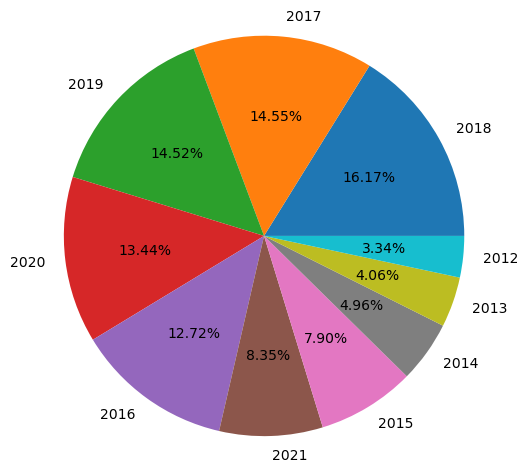

In [24]:
plt.pie(release_year[0],labels = release_year['release_year'],autopct = '%1.2f%%',radius = 1.3)

Observation

More number of TV Shows or Movies were added in the year 2018

In [25]:
genre = data.groupby(['rating']).size().reset_index()

In [26]:
genre

,rating,0
0,66 min,1
1,74 min,1
2,84 min,1
3,G,41
4,NC-17,3
5,NR,80
6,PG,287
7,PG-13,490
8,R,799
9,TV-14,2160


In [27]:
px.pie(genre,names=genre['rating'],values=genre[0])

Observation

34.1% of TV Shows or Movies is of type 'Mature audience'